In [3]:
%load_ext autoreload
%autoreload 2
from ASD_Circuits import *

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
Aggregate = pd.read_csv("../dat/genes/asd/DenovoWEST_TADA.txt", delimiter="\t")
Aggregate['pDenovoWEST'] = pd.to_numeric(Aggregate["pDenovoWEST"], errors='coerce')
Agg_gene2None, Agg_gene2MutN = Aggregate_Gene_Weights(Aggregate, out = "dat/bias2/meta.gene.weights.csv")
print(len(Agg_gene2MutN))

101


In [13]:
Agg_Match = MakeMatchDF(Agg_gene2MutN, N=1000)

In [14]:
Agg_Match.head(2)

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
6326,6326,23234,23516,387893,348980,7043,80279,81849,10890,83592,...,163590,253260,80737,9939,54797,2044,9842,23234,6508,51426
57680,57680,50485,151903,166614,9775,10123,27244,81846,151354,79734,...,54708,3202,65264,3747,23207,10999,5899,50485,79939,54463


In [15]:
Agg_Match.to_csv("dat/AggMatch.csv")

In [17]:
MatchDF = pd.read_csv("dat/AggMatch.csv", index_col="GENE")

In [22]:
idx = '6'

weights = [Agg_gene2MutN[k] for k in MatchDF.index]
TMP_Match = MatchDF.drop(axis=1, labels=idx, inplace=False)
TMP_Match.index = MatchDF[idx].values
tmp_dict = list(zip(MatchDF[idx].values, weights))

In [25]:
TMP_Match.loc[7846,:].values[0]

array([    22941,        58,     64219,      6638,      7846,      7184,
            7846,      7846,      7846,     51195,     93621,     27065,
            7846,      6767,      7846,      9524,      7846,      7846,
            5885,      7846,      7846,       961,      7846,     22920,
           51560,     55272,     81492,      7080,      7846,      9900,
           51552,     54497,      1152,     51310,      7846,      7846,
            7846,    114823,      7846,     80762,      7846,      7846,
            7846,     56956,    347733,      7846,      6942,      5296,
            7846,      7846,      5296,      7846,     10540,      5128,
            4779,     60592,     27239,    147700,      7846,      9500,
            7846,       334,    257629,     23761,      7846,    116841,
           23029,      7846,      8745,      7846,     10521,      7846,
            8405,      7345,     10099,      7846,      7846,      7167,
            7846,      7846,      5610,      7846, 

In [4]:
Cont_Bias_Dir = "dat/cont.bias"
STRFil = "/Users/jiayao/Work/ASD_Circuits/dat/allen-mouse-exp/Structures.txt"
STRs = [x.strip() for x in open(STRFil, "rt")]
dat = []
for i in range(1, 1000):
    fname = "{}/ASD.MetaMatch.Spec.bias.{}.csv".format(Cont_Bias_Dir, i)
    df = pd.read_csv(fname, index_col="STR")
    dat.append(df.index)

In [5]:
ContRanks = pd.DataFrame(data=dat)
ContRanks = ContRanks.transpose()
print(ContRanks.shape)

(213, 999)


In [6]:
ContRanks.head(2)

,0,1,2,3,4,5,6,7,8,9,...,989,990,991,992,993,994,995,996,997,998
0,Gigantocellular_reticular_nucleus,Dentate_gyrus,Lateral_posterior_nucleus_of_the_thalamus,Anterior_cingulate_area_ventral_part,Central_linear_nucleus_raphe,Ventromedial_hypothalamic_nucleus,Lateral_preoptic_area,Orbital_area_lateral_part,Ventral_posterolateral_nucleus_of_the_thalamus,Retrosplenial_area_lateral_agranular_part,...,Superior_olivary_complex,Field_CA1,Ansiform_lobule,Spinal_nucleus_of_the_trigeminal_oral_part,Nucleus_raphe_magnus,Superior_colliculus_motor_related,Dorsal_auditory_area,Parvicellular_reticular_nucleus,Supratrigeminal_nucleus,Posterior_hypothalamic_nucleus
1,Medullary_reticular_nucleus_ventral_part,Nucleus_of_the_optic_tract,Accessory_olfactory_bulb,Inferior_colliculus_external_nucleus,Nucleus_raphe_magnus,Lateral_septal_nucleus_caudal_caudodorsal_part,Medial_septal_nucleus,Ventral_part_of_the_lateral_geniculate_complex,Reticular_nucleus_of_the_thalamus,Superior_central_nucleus_raphe,...,Spinal_nucleus_of_the_trigeminal_interpolar_part,Lateral_dorsal_nucleus_of_thalamus,Paraflocculus,Principal_sensory_nucleus_of_the_trigeminal,Lateral_vestibular_nucleus,Nucleus_of_the_posterior_commissure,Retrosplenial_area_ventral_part,Nucleus_of_the_solitary_tract,Motor_nucleus_of_trigeminal,Anterior_hypothalamic_nucleus


In [7]:
g = LoadConnectome2(ConnFil=
                    "../dat/allen-mouse-conn/norm_density-max_ipsi_contra-pval_0.05-deg_min_1-by_weight_pvalue.csv")
EdgeWeightsDict = EdgeDict(g, keyon="label")

In [8]:
meta_jon = pd.read_csv("dat/Jon_data/exp_bias-match-specific.csv")
meta_jon.columns = ["STR", "EFFECT", "Rank", "NGene"]
meta_jon = meta_jon.set_index("STR")
meta_jon.head(2)

,EFFECT,Rank,NGene
STR,,,
Dentate_gyrus,0.511273,1,95
Prelimbic_area,0.463267,2,95


In [10]:
Candidate = meta_jon.head(50).index.values
ScoreSTRSet(g, Candidate, EdgeWeightsDict)

0.36263797442835155

In [11]:
def onexxx(meta_jon, N, g=g, EdgeWeightsDict=EdgeWeightsDict, MatchDF=ContRanks):
    CandidateNodes = meta_jon.head(N).index.values
    xxx = ScoreSTRSet(g, CandidateNodes, EdgeWeightsDict)
    YYY = []
    for i in range(999):
        CandidateNodes = MatchDF.loc[0:N, i].values
        #print(CandidateNodes)
        yyy = ScoreSTRSet(g, CandidateNodes, EdgeWeightsDict)
        YYY.append(yyy)
    return xxx, YYY
XXX1, YYY1 = [], []
for i in range(213):
    xxx, yyy = onexxx(meta_jon, i)
    XXX1.append(xxx)
    YYY1.append(yyy)

/Users/jiayao/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2920: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/jiayao/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:85: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


In [30]:
def onexxx(meta_jon, N, g=g, EdgeWeightsDict=EdgeWeightsDict, MatchDF=ContRanks):
    CandidateNodes = meta_jon.head(N).index.values
    xxx = ScoreSTRSet(g, CandidateNodes, EdgeWeightsDict)
    YYY = []
    for i in range(999):
        CandidateNodes = MatchDF.loc[0:N, i].values
        #print(CandidateNodes)
        yyy = ScoreSTRSet(g, CandidateNodes, EdgeWeightsDict)
        YYY.append(yyy)
    return xxx, YYY
xxx, yyy = onexxx(meta_jon, 50)

In [31]:
np.mean(yyy)

0.32356623711484256

In [32]:
xxx

0.36263797442835155

In [16]:
YYY_y = [np.mean(x) for x in YYY1]
YYY_e = [np.var(x) for x in YYY1]

In [13]:
def onexxx(meta_jon, N, g=g, EdgeWeightsDict=EdgeWeightsDict, MatchDF=ContRanks):
    CandidateNodes = meta_jon.head(N).index.values
    xxx = ScoreSTRSet(g, CandidateNodes, EdgeWeightsDict, Direction=True, Weighted=True)
    YYY = []
    for i in range(999):
        CandidateNodes = MatchDF.loc[0:N, i].values
        yyy = ScoreSTRSet(g, CandidateNodes, EdgeWeightsDict, Direction=True, Weighted=True)
        YYY.append(yyy)
    return xxx, YYY
XXX2, YYY2 = [], []
for i in range(213):
    xxx, yyy = onexxx(meta_jon, i)
    XXX2.append(xxx)
    YYY2.append(yyy)

/Users/jiayao/Work/ASD_Circuits/src/ASD_Circuits.py:1008: RuntimeWarning: invalid value encountered in double_scalars
  return max(Frac_In, Frac_Out), Frac_In/Frac_Out
/Users/jiayao/Work/ASD_Circuits/src/ASD_Circuits.py:1008: RuntimeWarning: divide by zero encountered in double_scalars
  return max(Frac_In, Frac_Out), Frac_In/Frac_Out


In [14]:
YYY_y2 = [np.mean(x) for x in YYY2]
YYY_e2 = [np.std(x)/np.sqrt(1) for x in YYY2]

Text(0, 0.5, 'Cohe')

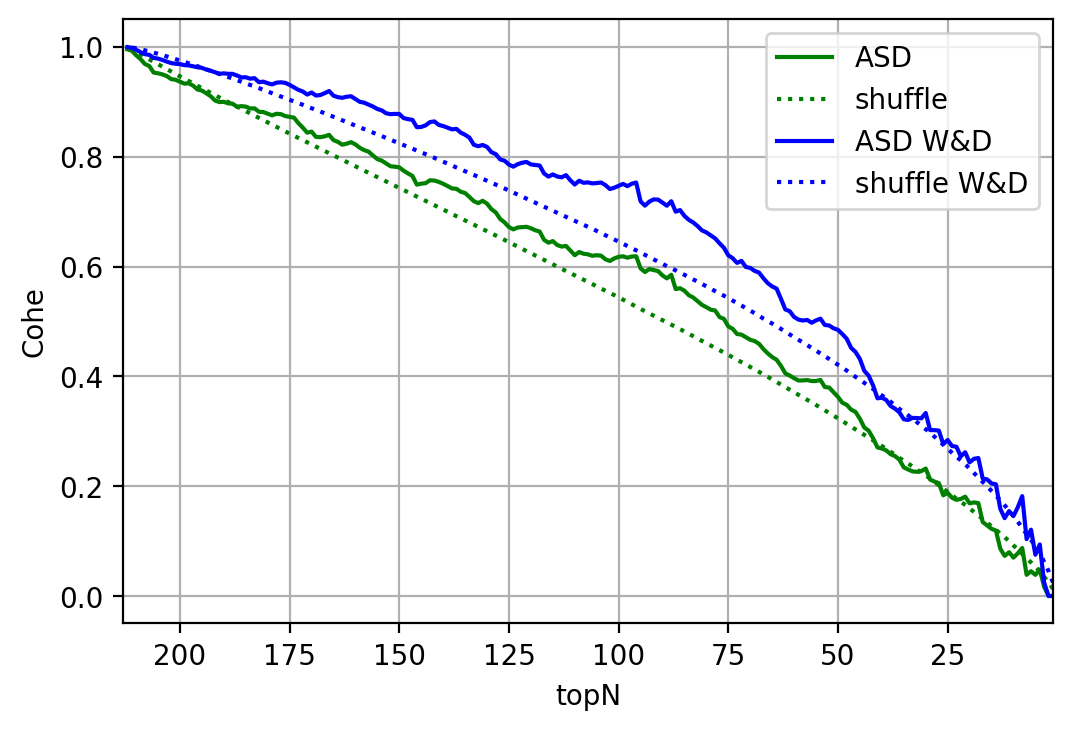

In [15]:
fig, ax = plt.subplots(dpi=200)
ax.plot(list(range(1,213,1)), XXX1[1:213], label="ASD", color="green", linestyle="-")
ax.plot(list(range(1,213,1)), YYY_y[1:213], label="shuffle", color="green", linestyle="dotted")
ax.plot(list(range(1,213,1)), XXX2[1:213], label="ASD W&D", color="blue", linestyle="-")
ax.plot(list(range(1,213,1)), YYY_y2[1:213], label="shuffle W&D", color="blue", linestyle="dotted")
ax.set_xlim(213, 1)  # decreasing time
ax.legend()
plt.grid(True)
plt.xlabel("topN")
plt.ylabel("Cohe")

In [24]:
def movingAVG(Input, smoothLen=3):
    res = []
    for i in range(len(Input)):
        if i - smoothLen < 0:
            new = np.mean(Input[0:i+smoothLen])
        elif i+ smoothLen > len(Input):
            new = np.mean(Input[i-smoothLen:])
        else:
            new = np.mean(Input[i-smoothLen:i+smoothLen])
        res.append(new)
    return res

In [25]:
unweight = movingAVG(np.array(XXX1[1:213])/np.array(YYY_y[1:213]))
weighted = movingAVG(np.array(XXX2[1:213])/np.array(YYY_y2[1:213]))

Text(0, 0.5, 'Ratio')

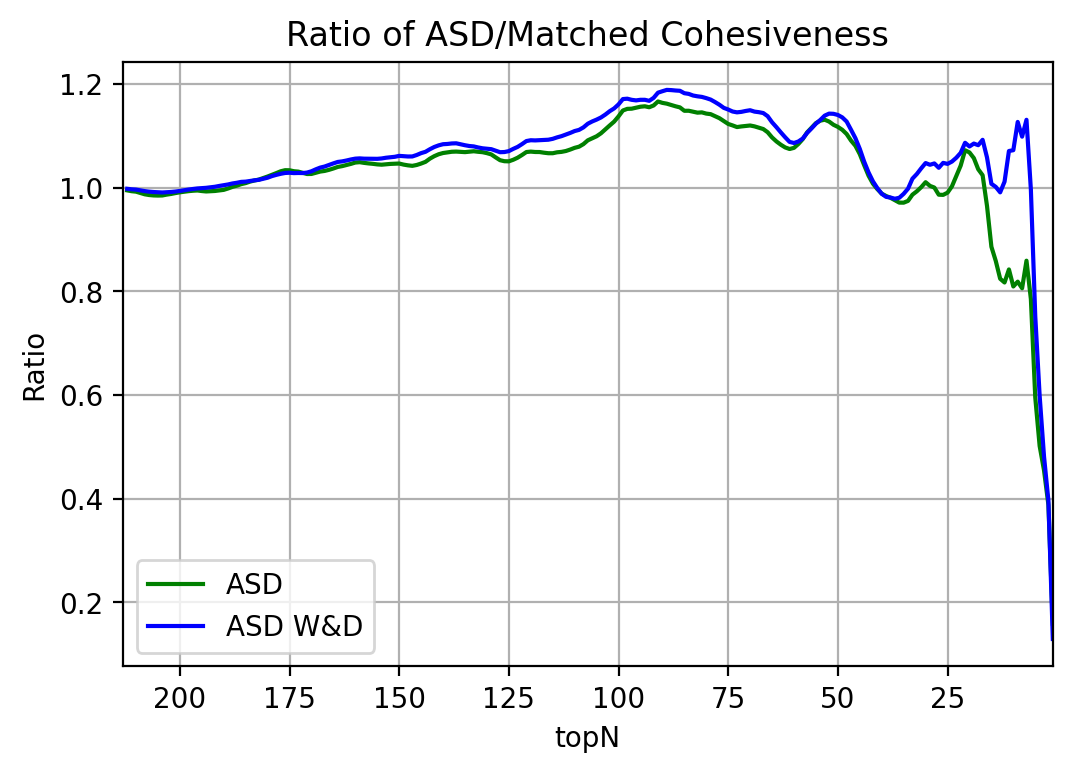

In [27]:
fig, ax = plt.subplots(dpi=200)
ax.plot(list(range(1,213,1)), unweight, label="ASD", color="green", linestyle="-")
ax.plot(list(range(1,213,1)), weighted, label="ASD W&D", color="blue", linestyle="-")
ax.set_xlim(213, 1)  # decreasing time
ax.legend()
plt.title("Ratio of ASD/Matched Cohesiveness")
plt.grid(True)
plt.xlabel("topN")
plt.ylabel("Ratio")

In [35]:
df = pd.read_csv("dat/cont.cir/ASD.MetaMatch.1.csv", names=None)

In [36]:
Candidate = df

,Gigantocellular_reticular_nucleus,Medullary_reticular_nucleus_ventral_part,Parvicellular_reticular_nucleus,Pontine_reticular_nucleus_caudal_part,Pontine_reticular_nucleus,Pedunculopontine_nucleus,Interposed_nucleus,Midbrain_reticular_nucleus,Medullary_reticular_nucleus_dorsal_part,Spinal_vestibular_nucleus,...,Parafascicular_nucleus,Dorsal_premammillary_nucleus,Subparafascicular_nucleus_parvicellular_part,Tegmental_reticular_nucleus,Substantia_nigra_compact_part,Periaqueductal_gray,Lateral_hypothalamic_area,Dentate_nucleus,Nucleus_of_the_lateral_lemniscus,Nucleus_accumbens
0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0


In [ ]:
complete = ScoreSTRSet(g_local, InCirtuitNodes, EdgeWeightsDict)
local = ScoreSTRSet(g_local, InCirtuitNodes, EdgeWeightsDict)
distal = ScoreSTRSet(g_distal, InCirtuitNodes, EdgeWeightsDict)